<a href="https://colab.research.google.com/github/Nardy07/NIDS/blob/main/try27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [ ]:
X_selected = pd.read_csv('X_selected.csv')
y = pd.read_csv('y.csv')

In [ ]:
X_selected

,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Max,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Init_Bwd_Win_Byts
0,-0.370661,-0.361533,-0.370505,2.263739,4.590637,2.995018,0.471796,4.347100,-0.189354,2.477885
1,-0.317948,-0.360179,-0.329488,7.119662,5.353110,4.297869,0.980947,5.031255,6.384897,2.420659
2,-0.378125,-0.359461,-0.372226,0.006001,-0.035646,0.085284,-0.047994,-0.041103,0.091383,2.420659
3,-0.380181,-0.363406,-0.374652,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.249572,2.420615
4,-0.372799,-0.359629,-0.372632,0.528413,1.018069,0.871613,0.008384,0.970252,1.308591,2.420659
...,...,...,...,...,...,...,...,...,...,...
205162,-0.369667,-0.323059,-0.360782,-0.158086,-0.269257,-0.217665,-0.053094,-0.281918,-0.232329,-0.415265
205163,-0.369778,-0.350099,-0.361869,-0.153017,-0.244059,-0.204767,-0.053066,-0.257822,-0.242182,-0.415265
205164,-0.378771,-0.360701,-0.372962,-0.156219,-0.248989,-0.208679,-0.053076,-0.262389,-0.222583,-0.408592
205165,-0.369617,-0.322867,-0.360776,-0.158086,-0.269257,-0.217665,-0.053094,-0.281918,-0.232329,-0.415265


In [ ]:
y

,Abnormal,Normal
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
205162,True,False
205163,True,False
205164,True,False
205165,True,False


In [105]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_selected,y, test_size=0.25, random_state=42)

In [106]:
# Reshape input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [107]:
X_train.shape[1]

1

In [108]:

lst = Sequential([LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),LSTM(50),Dense(y_train.shape[1], activation='sigmoid')])


In [109]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [110]:
lst.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 100)            44400     
                                                                 
 lstm_11 (LSTM)              (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 74702 (291.80 KB)
Trainable params: 74702 (291.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
# training the model on training dataset
history = lst.fit(X_train, y_train, epochs=100, batch_size=16,validation_data=(X_test,y_test))

Epoch 1/100
9618/9618 [==============================] - 54s 5ms/step - loss: 0.0401 - accuracy: 0.9908 - val_loss: 0.0327 - val_accuracy: 0.9922
Epoch 2/100
9618/9618 [==============================] - 52s 5ms/step - loss: 0.0324 - accuracy: 0.9931 - val_loss: 0.0309 - val_accuracy: 0.9934
Epoch 3/100
9618/9618 [==============================] - 62s 6ms/step - loss: 0.0315 - accuracy: 0.9932 - val_loss: 0.0323 - val_accuracy: 0.9934
Epoch 4/100
9618/9618 [==============================] - 54s 6ms/step - loss: 0.0306 - accuracy: 0.9933 - val_loss: 0.0298 - val_accuracy: 0.9928
Epoch 5/100
9618/9618 [==============================] - 48s 5ms/step - loss: 0.0298 - accuracy: 0.9934 - val_loss: 0.0301 - val_accuracy: 0.9937
Epoch 6/100
9618/9618 [==============================] - 53s 6ms/step - loss: 0.0293 - accuracy: 0.9936 - val_loss: 0.0277 - val_accuracy: 0.9942
Epoch 7/100
9618/9618 [==============================] - 53s 5ms/step - loss: 0.0283 - accuracy: 0.9936 - val_loss: 0.0264 -

In [112]:
# predicting target attribute on testing dataset
test_results = lst.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

1603/1603 [==============================] - 3s 2ms/step - loss: 0.0136 - accuracy: 0.9981
Test results - Loss: 0.013626476749777794 - Accuracy: 99.80893731117249%


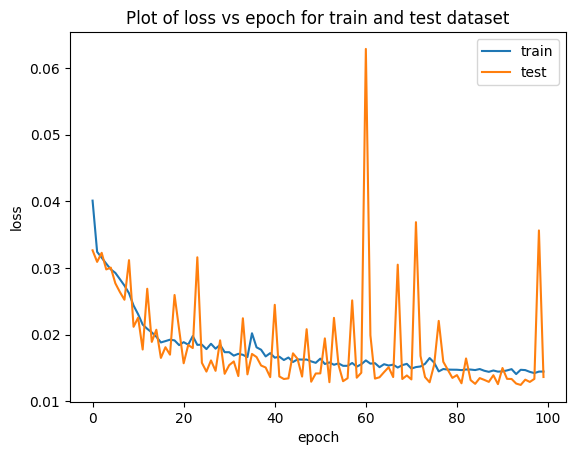

In [113]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('lstm_binary_accuracy.png')
plt.show()

In [114]:
# Make predictions
y_pred = lst.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

1603/1603 [==============================] - 4s 2ms/step


In [115]:
y_test_labels = y_test.idxmax(axis=1)
y_pred_labels = pd.Series(y_pred).map({i: label for i, label in enumerate(y.columns)})

Confusion Matrix:
[[34290     9]
 [   89 16904]]


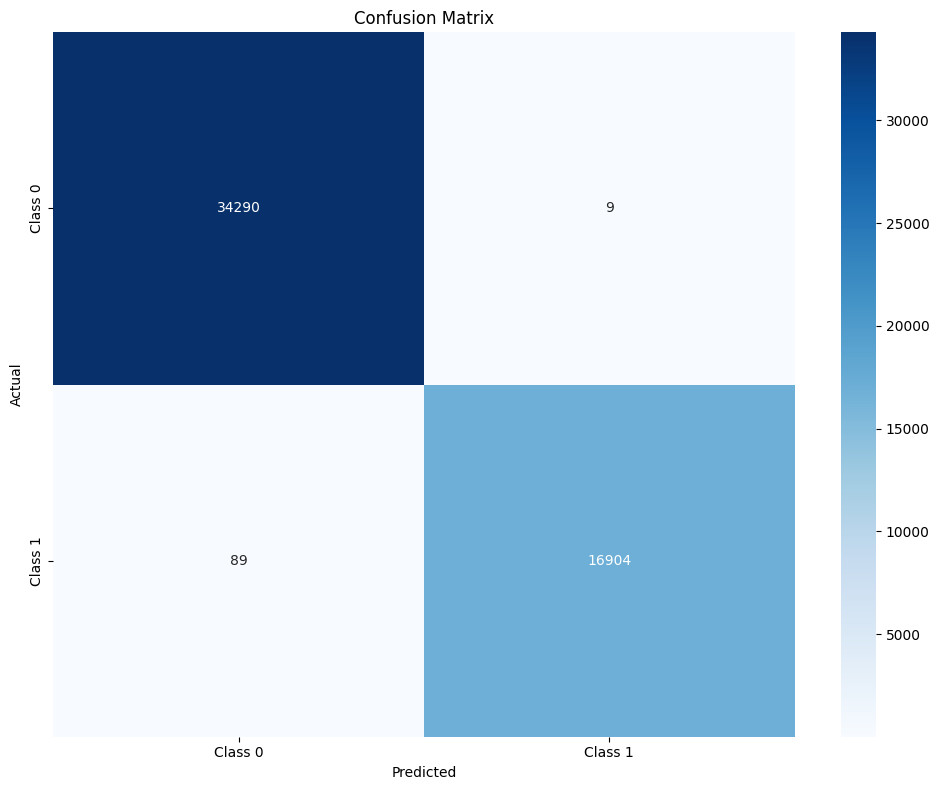

In [116]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[0])], yticklabels=['Class {}'.format(i) for i in range(conf_matrix.shape[0])])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
plt.show()

TESTING PHASE

In [117]:
X_df=pd.read_csv('X_val_selected.csv')
y_df=pd.read_csv('y_true_labels1.csv')

In [118]:
X_val = X_df.values.reshape((X_df.shape[0], 1, X_df.shape[1]))

In [119]:
y_df

,Abnormal,Normal
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
73982,True,False
73983,True,False
73984,True,False
73985,True,False


In [120]:
# Make predictions
y_val = lst.predict(X_val)
y_val = np.argmax(y_val,axis=1)

2313/2313 [==============================] - 5s 2ms/step


In [124]:
y_test_labels1 = y_df.idxmax(axis=1)
y_pred_labels1 = pd.Series(y_val).map({i: label for i, label in enumerate(y.columns)})

Confusion Matrix:
[[ 4424 67548]
 [  367  1648]]


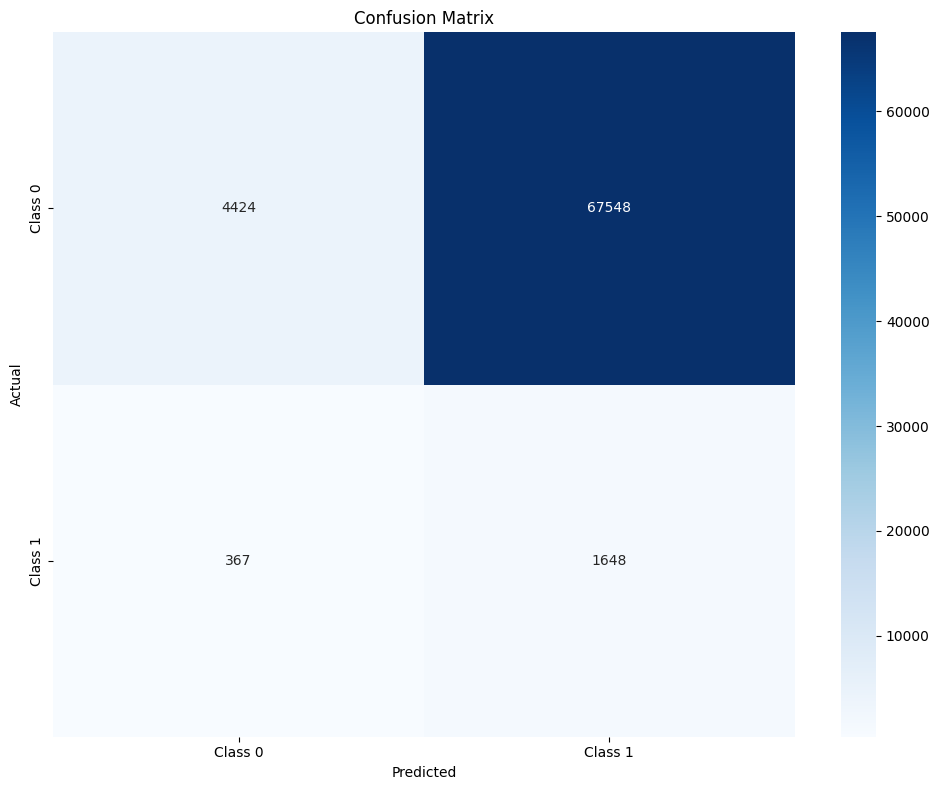

In [125]:
conf_matrix_val = confusion_matrix(y_test_labels1, y_pred_labels1)
print("Confusion Matrix:")
print(conf_matrix_val)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Class {}'.format(i) for i in range(conf_matrix_val.shape[0])], yticklabels=['Class {}'.format(i) for i in range(conf_matrix_val.shape[0])])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
plt.show()